In [2]:
import pandas as pd
mydata = pd.read_csv("/Users/igwonseong/Downloads/상관분석.csv")

In [3]:
del mydata['1주차누적관객수']
del mydata['영화명']
mydata.head()

,감독파워,배우파워,제작사파워,1주차최대스크린수,개봉전리뷰수
0,1671548.000,5531991.944,2771210.000,1081,54
1,4070891.000,1568615.667,6308705.917,990,265
2,7759473.000,5244403.929,4362083.400,1009,76
3,1441763.333,1459294.633,2616067.000,781,22
4,416303.000,2820275.200,577580.250,627,59


In [4]:
#상관계수행렬
mydata.corr()

,감독파워,배우파워,제작사파워,1주차최대스크린수,개봉전리뷰수
감독파워,1.000000,0.754912,0.754283,0.774894,0.282271
배우파워,0.754912,1.000000,0.717066,0.730314,0.289660
제작사파워,0.754283,0.717066,1.000000,0.681813,0.192975
1주차최대스크린수,0.774894,0.730314,0.681813,1.000000,0.286775
개봉전리뷰수,0.282271,0.289660,0.192975,0.286775,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

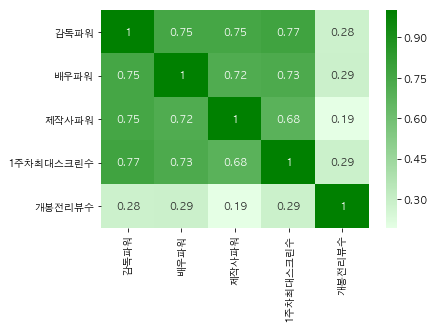

In [7]:
#상관계수행렬 heatmap
cmap=sns.light_palette('green',as_cmap=True)
sns.heatmap(mydata.corr(),annot=True,cmap=cmap)
plt.show()

In [8]:
#pca를 위한 정규화
from sklearn.preprocessing import StandardScaler
MyDatascaled = StandardScaler().fit_transform(mydata.values)

In [9]:
#3개로 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(MyDatascaled)
MyDatascaled_pca = pca.transform(MyDatascaled)
print(MyDatascaled_pca.shape)

(215, 3)


In [10]:
pca_columns=['pca_component_1','pca_component_2','pca_component_3']
irisDF_pca = pd.DataFrame(MyDatascaled_pca,columns=pca_columns)
irisDF_pca.head(3)

,pca_component_1,pca_component_2,pca_component_3
0,0.806501,-0.485400,-0.224006
1,1.147869,0.112637,1.359474
2,2.251311,-0.773932,0.352440


In [11]:
#pca1,pca2가 80% 차원 2개로 압축!
print(pca.explained_variance_ratio_)

[0.6653368  0.17805645 0.06238876]


In [12]:
#다중공선성은 VIF로 확인해야 상광행렬로 파악하면 안됨! VIF 10 이상만 아니면됨!
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mydata.values, i) for i in range(mydata.shape[1])]
vif["features"] = mydata.columns
vif

,VIF Factor,features
0,5.699164,감독파워
1,9.100701,배우파워
2,7.290777,제작사파워
3,7.468875,1주차최대스크린수
4,1.533903,개봉전리뷰수
